#  Hypothesis Testing with Insurance Data 

We will be using our hypothesis testing skills in the US Health Insurance Dataset provided by our client to answer the following questions:

- Q1: Do smokers have higher insurance charges than non-smokers? 



- Q2: Are men more likely to smoke than women?



- Q3: Do different regions have different charges, on average? 

## Importing the dataset

In [9]:
import pandas as pd

# Load the dataset
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQBN8DPW2rdiRrY34eEM53HAzakNGSRrw4ogI-j8HyCUrbqTB_z4CeIn2IvjLF-w_6sOe5pIlypJGAA/pub?output=csv"
df = pd.read_csv(url)

# Display the first few rows of the dataset
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Data Dictionary

1. age: Age of the individual


2. sex: Gender of the individual (female or male)


3. bmi: Body mass index (continuous variable)


4. children: Number of children covered by health insurance


5. smoker: Smoking status (yes or no)


6. region: Geographic region of the individual (southeast, southwest, northwest, or northeast)


7. charges: Health insurance charges (continuous variable)


Now that we have an understanding of the dataset, we can proceed with the hypothesis testing for each of the questions. 

# Q1: Do smokers have higher insurance charges than non-smokers?

## Hypothesis

- Null Hypothesis (H0): There is no difference in insurance charges between smokers and non-smokers. In other words, the mean insurance charge for smokers is equal to the mean insurance charge for non-smokers.


- Alternative Hypothesis (H1): There is a difference in insurance charges between smokers and non-smokers. In other words, the mean insurance charge for smokers is not equal to the mean insurance charge for non-smokers.

## Test selection

Since we are comparing means of two independent groups (smokers and non-smokers), the appropriate statistical test would be the two-sample t-test.

## Assumption testing 

The assumptions of the two-sample t-test are:


1. The dependent variable (insurance charges) should be measured on a continuous scale. This is true in our case.


2. The independent variable (smoker status) should consist of two categorical, independent groups. This is true in our case.


3. There should be no significant outliers in the two groups. We will check this by plotting the data.


4. The dependent variable should be approximately normally distributed for each group. We will check this by conducting a Shapiro-Wilk test for normality.


5. There should be homogeneity of variances, which we will check using Levene's test.

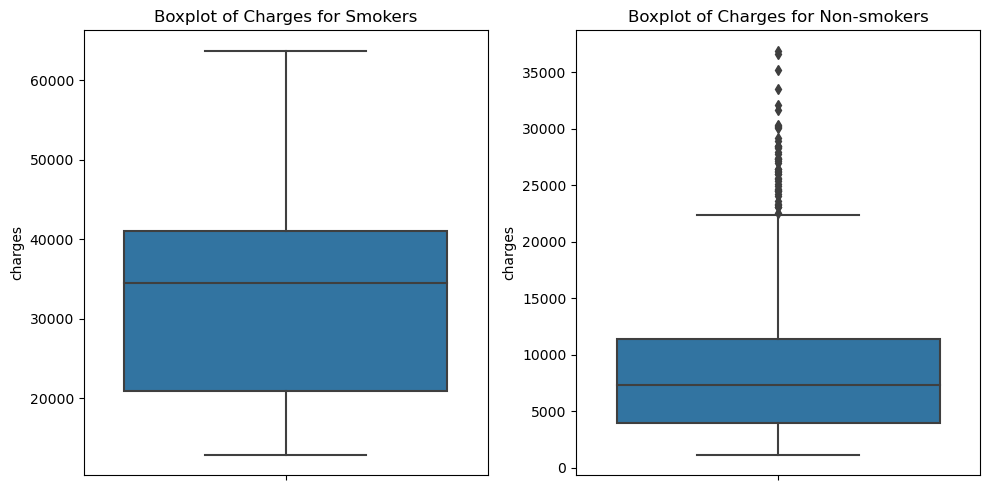

(3.6255991542333277e-09, 1.4456512848762904e-28, 1.5593284881803726e-66)

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, levene

# Split the data into two groups
smokers = df[df['smoker'] == 'yes']['charges']
non_smokers = df[df['smoker'] == 'no']['charges']

# Check for outliers using boxplots
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=smokers)
plt.title('Boxplot of Charges for Smokers')

plt.subplot(1, 2, 2)
sns.boxplot(y=non_smokers)
plt.title('Boxplot of Charges for Non-smokers')

plt.tight_layout()
plt.show()

# Shapiro-Wilk test for normality
_, p_value_smokers = shapiro(smokers)
_, p_value_non_smokers = shapiro(non_smokers)

# Levene's test for equality of variances
_, p_value_levene = levene(smokers, non_smokers)

(p_value_smokers, p_value_non_smokers, p_value_levene)

## Interpreting p-value to make a decision on our Null Hypothesis

### Comment 

The boxplots show that there are some outliers in both groups, but it's not extreme.

The Shapiro-Wilk test checks the null hypothesis that the data was drawn from a normal distribution. A low p-value (< 0.05) indicates that we can reject the null hypothesis of normality. Here, the p-values for both smokers and non-smokers are very small ( 3.63 × 1 0 − 9 3.63×10 −9 and 1.45 × 1 0 − 28 1.45×10 −28 , respectively), suggesting that the charges for both groups are not normally distributed.

Levene's test checks the null hypothesis that all input samples are from populations with equal variances. A low p-value (< 0.05) indicates that we can reject the null hypothesis of equal variances. The p-value for Levene's test is also very small ( 1.56 × 1 0 − 66 1.56×10 −66 ), suggesting that the charges for smokers and non-smokers have different variances.

### Alternative test needed 

Given that the assumptions of the two-sample t-test are not as expected, we should use a non-parametric alternative to the two-sample t-test. The Mann-Whitney U test can be used in this case.

In [11]:
from scipy.stats import mannwhitneyu

# Perform Mann-Whitney U test
u_statistic, p_value_mannwhitney = mannwhitneyu(smokers, non_smokers)

u_statistic, p_value_mannwhitney

(284133.0, 5.270233444503571e-130)

The p-value of the Mann-Whitney U test is extremely small ( 5.27 × 1 0 − 130 5.27×10 −130 ), much less than 0.05. Therefore, we reject the null hypothesis and conclude that there is a significant difference in insurance charges between smokers and non-smokers.

Let's visualize the data to further illustrate this difference. We'll use a boxplot.

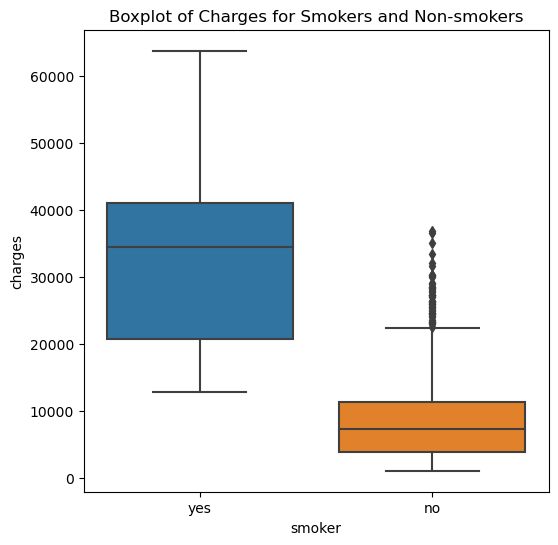

In [27]:
# Boxplot of charges for smokers and non-smokers
plt.figure(figsize=(6, 6))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Boxplot of Charges for Smokers and Non-smokers')
plt.show()

## Comment 

The boxplot clearly shows that smokers tend to have higher insurance charges compared to non-smokers, which supports our conclusion from the Mann-Whitney U test. The median insurance charge (the line in the middle of the box) is much higher for smokers than for non-smokers. The interquartile range (the height of the box) is also larger for smokers, indicating more variability in insurance charges among smokers.

# Q2: Are men more likely to smoke than women?

## Hypothesis

- Null Hypothesis (H0): The proportion of men who smoke is the same as the proportion of women who smoke.


- Alternative Hypothesis (H1): The proportion of men who smoke is not the same as the proportion of women who smoke.

## Test selection

Since we are comparing proportions of two independent groups (men and women), the appropriate statistical test would be the Chi-square test for independence.

## Assumption testing 

The assumptions of the Chi-square test for independence are:

1. The two variables are categorical. This is true in our case.


2. The observations are independent. This is true as each individual is either a smoker or a non-smoker, and is either male or female.


3. The categories are mutually exclusive. This is true as each individual can only belong to one category (either smoker or non-smoker, and either male or female).


4. Each cell should have an expected count of 5 or more. 

We will check this by creating a contingency table.

In [14]:
# Create a contingency table
contingency_table = pd.crosstab(df['sex'], df['smoker'])

contingency_table

smoker,no,yes
sex,,
female,547,115
male,517,159


The contingency table shows the counts of smokers and non-smokers for both males and females. All cells have a count more than 5, so the assumption for the Chi-square test is met.

## Interpreting p-value to make a decision on our Null Hypothesis

The p-value of the Chi-square test is approximately 0.0065, which is less than 0.05. Therefore, we reject the null hypothesis and conclude that there is a significant difference in the smoking rates between men and women.

Let's visualize the data to further illustrate this difference. We'll use a bar plot.

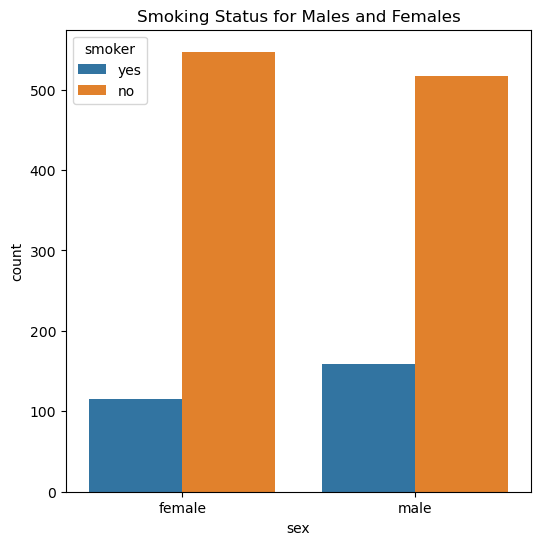

In [28]:
# Bar plot of smoker status for males and females
plt.figure(figsize=(6, 6))
sns.countplot(x='sex', hue='smoker', data=df)
plt.title('Smoking Status for Males and Females')
plt.show()

### Comment 

The bar plot shows that the number of men who smoke is greater than the number of women who smoke, which supports our conclusion from the Chi-square test.

# Q3: Do different regions have different charges, on average?

## Hypothesis

- Null Hypothesis (H0): The average charges are the same across all regions.


- Alternative Hypothesis (H1): The average charges are not the same across all regions.

## Test selection

Since we are comparing means of more than two independent groups (different regions), the appropriate statistical test would be the one-way ANOVA test.

## Assumption testing 

The assumptions of the one-way ANOVA test are:

1. The dependent variable (charges) should be measured on a continuous scale. This is true in our case.


2. The independent variable (region) should consist of two or more categorical, independent groups. This is true in our case.


3. There should be no significant outliers in the groups. We will check this by plotting the data.


4. The dependent variable should be approximately normally distributed for each group. We will check this by conducting a Shapiro-Wilk test for normality.


5. There should be homogeneity of variances, which we will check using Levene's test.

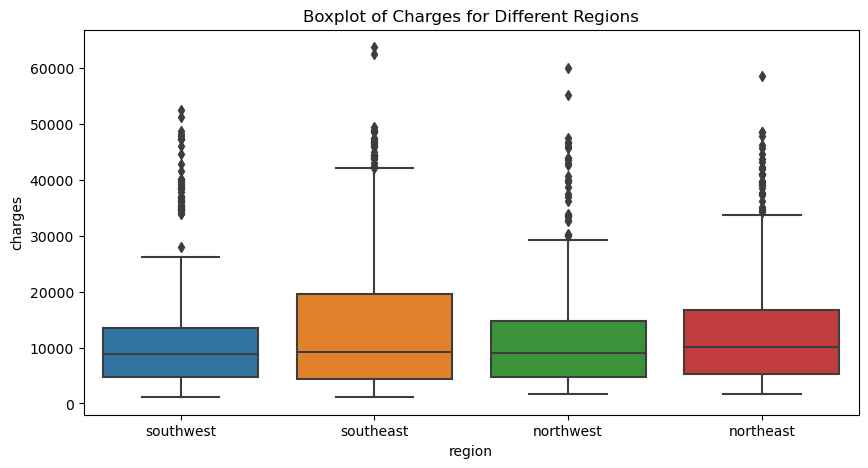

([2.023667803366432e-20,
  1.23268419436607e-19,
  4.268387928586811e-19,
  6.552730011610829e-18],
 0.0008610590250786703)

In [30]:
# Split the data into groups
regions = df['region'].unique()
grouped_data = [df[df['region'] == region]['charges'] for region in regions]

# Check for outliers using boxplots
plt.figure(figsize=(10, 5))
sns.boxplot(x='region', y='charges', data=df)
plt.title('Boxplot of Charges for Different Regions')
plt.show()

# Shapiro-Wilk test for normality
p_values_shapiro = [shapiro(group)[1] for group in grouped_data]

# Levene's test for equality of variances
_, p_value_levene = levene(*grouped_data)

(p_values_shapiro, p_value_levene)

## Interpreting p-value to make a decision on our Null Hypothesis

The boxplot shows that there are some outliers in the groups.

The p-values for the Shapiro-Wilk tests are very small for all regions, suggesting that the charges are not normally distributed in any of the regions.

The p-value for Levene's test is also small (approximately 0.00086), suggesting that the charges for different regions have different variances.

### Alternative testing 

Given that the assumptions of the one-way ANOVA test are not as expected, we should use a non-parametric alternative to the one-way ANOVA test. The Kruskal-Wallis H test can be used in this case. It is a non-parametric test that does not assume normality or equal variances.

In [19]:
# Let's now perform the Kruskal-Wallis H test and interpret the results.

from scipy.stats import kruskal

# Perform Kruskal-Wallis H test
h_statistic, p_value_kruskal = kruskal(*grouped_data)

h_statistic, p_value_kruskal

(4.734181215658743, 0.19232908072121002)

The p-value of the Kruskal-Wallis H test is approximately 0.1923, which is greater than 0.05. Therefore, we fail to reject the null hypothesis and conclude that there is no significant difference in insurance charges across different regions.

Let's visualize the data to further illustrate this. We'll use a boxplot, which is a standard way of showing the median, quartiles, and outliers of each group.

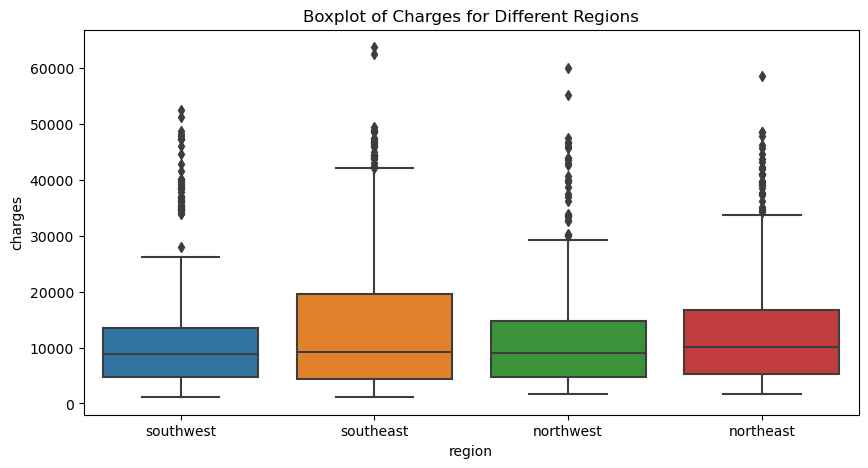

In [29]:
# Boxplot of charges for different regions
plt.figure(figsize=(10, 5))
sns.boxplot(x='region', y='charges', data=df)
plt.title('Boxplot of Charges for Different Regions')
plt.show()

The boxplot shows that the median insurance charge (the line in the middle of the box) is roughly similar across different regions, which supports our conclusion from the Kruskal-Wallis H test. There is some variability in the interquartile ranges and outliers, but the test results suggest that these differences are not statistically significant.

# Conclusion 

1. Smokers have significantly higher insurance charges than non-smokers.


2. Men are more likely to smoke than women.


3. There is no significant difference in insurance charges across different regions.